In [5]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager

# get data for a Sevilla versus Barcelona match with a high amount of shots
kwargs = {'related_event_df': False, 'shot_freeze_frame_df': False,
          'tactics_lineup_df': False, 'warn': False}
df = read_event(f'{EVENT_SLUG}/9860.json', **kwargs)['event']

# subset the barcelona shots
df_shots_barca = df[(df.type_name == 'Shot') & (df.team_name == 'Barcelona')].copy()
# subset the barca open play passes
df_pass_barca = df[(df.type_name == 'Pass') &
                   (df.team_name == 'Barcelona') &
                   (~df.sub_type_name.isin(['Throw-in', 'Corner', 'Free Kick', 'Kick Off']))].copy()

# setup a mplsoccer FontManager to download google fonts (Roboto-Regular / SigmarOne-Regular)
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

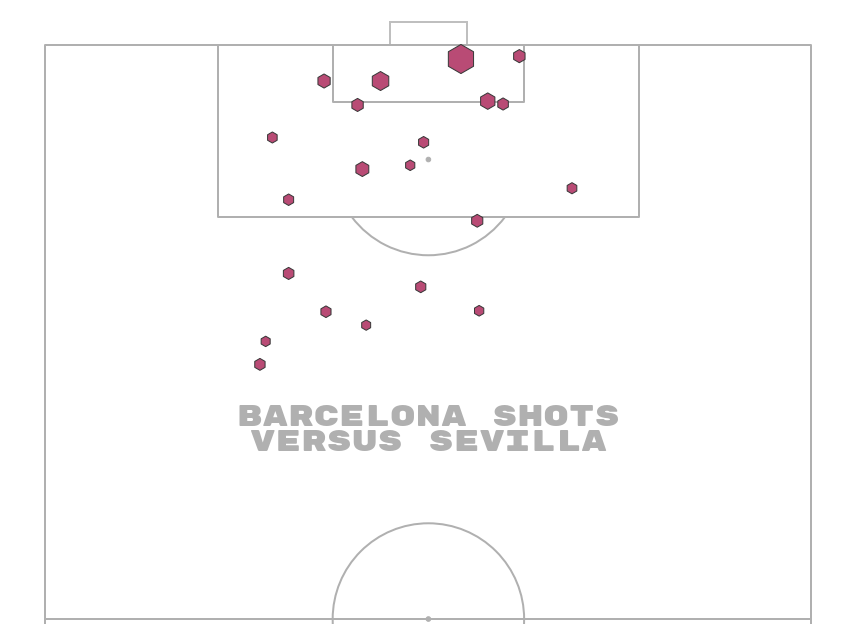

In [6]:
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))
sc = pitch.scatter(df_shots_barca.x, df_shots_barca.y,
                   # size varies between 100 and 1000 (points squared)
                   s=(df_shots_barca.shot_statsbomb_xg * 900) + 100,
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='h',
                   ax=ax)
txt = ax.text(x=40, y=80, s='Barcelona shots\nversus Sevilla',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')